In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
df = pd.read_csv("new_train.csv", header=0)
test = pd.read_csv("new_xtest.csv", header=0)

df=df.dropna()
test=test.dropna()



In [2]:

a=['Homepage', 'Homepage _Duration', 'Aboutus', 'Aboutus_Duration',
       'Contactus', 'Contactus_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month', 'OperatingSystems', 'Browser',
       'Province', 'TrafficType', 'VisitorType']

X = df[a]
x_test=test[a]
y = df['Revenue']

In [3]:
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
X = preprocessing.scale(X)
x_test = preprocessing.scale(x_test)

In [4]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state=42)

In [444]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=2), n_estimators=35,
algorithm="SAMME.R", learning_rate=0.193
)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [445]:
from sklearn import metrics
y_pred = ada_clf.predict(x_validation)
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.9016236867239733


In [5]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,
                          max_depth=10)
clf.fit(X,y)

# y_pred=clf.predict(x_validation)
# from sklearn import metrics

# print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [6]:
predictions=clf.predict(x_test)
i_d=range(1,1851)
di_ct={'ID':i_d,'Revenue':predictions}

testdf=pd.DataFrame(di_ct)
testdf.to_csv('file3.csv', header=True, index=False) 



In [439]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=a).sort_values(ascending=False)
feature_imp

PageValues            0.527809
ExitRates             0.083112
Contactus_Duration    0.077541
Contactus             0.062671
BounceRates           0.057333
Homepage _Duration    0.049108
Month                 0.048363
Homepage              0.039702
TrafficType           0.021536
Province              0.019058
VisitorType           0.013769
dtype: float64

No handles with labels found to put in legend.


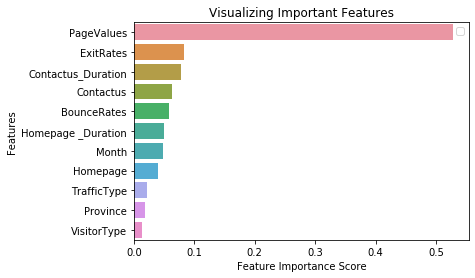

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

/home/shashimal/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
